# Python asignment 

## Dr. X find below the codes to get the output you want

In [ ]:
# install biopython

In [4]:
pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [41]:
# important modules

import Bio
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Data import CodonTable
import pandas as pd

The following commands give you the number sequences, which is nine 

In [7]:
bears_ctyb = SeqIO.parse('bears_cytb.fasta', 'fasta')

# Number of sequences
count = 0
for record in bears_ctyb:
    count +=1
    
count

9

In [8]:
# print id, description, representative sequence and length of each sequence.

for bears_ctyb in SeqIO.parse('bears_cytb.fasta', 'fasta'):
    print(bears_ctyb.id)  
    print(bears_ctyb.description)
    print(repr(bears_ctyb.seq)) # representative sequence, not the entire seq
    print(len(bears_ctyb))  

AF264047.1
AF264047.1 Ursus spelaeus cytochrome b gene, complete cds; mitochondrial gene for mitochondrial product
Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT...AGA')
1140
AB020907.1
AB020907.1 Ursus arctos mitochondrial gene for cytochrome b, complete cds
Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA')
1140
AB360958.1
AB360958.1 Ursus thibetanus mitochondrial cytb gene for cytochrome b, complete cds, haplotype: Cb-C1
Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCCAAAATCATCAACAACTCACTC...AGA')
1140
U23562.1
U23562.1 Melursus ursinus cytochrome b gene, mitochondrial gene encoding mitochondrial protein, isolate URUR2, complete cds
Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTC...AGA')
1140
AF268271.1
AF268271.1 Ursus americanus specimen-voucher AF21120 cytochrome b gene, complete cds; mitochondrial gene for mitochondrial product
Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA')
1140
U18899.1
U18899.1 Helarctos malayanus mitochondr

If you want to see each sequence individually, you can use the following codes to print them

In [9]:
bears_cytb = SeqIO.parse("bears_cytb.fasta", "fasta")
first_record = next(bears_cytb)
print(first_record.id)
print(first_record.description)
print(len(bears_ctyb))

second_record = next(bears_cytb)
print(second_record.id)
print(second_record.description)
print(len(bears_ctyb))

AF264047.1
AF264047.1 Ursus spelaeus cytochrome b gene, complete cds; mitochondrial gene for mitochondrial product
1140
AB020907.1
AB020907.1 Ursus arctos mitochondrial gene for cytochrome b, complete cds
1140


# GC content in each sequence
The GC content of each sequence can be printed as follows

In [56]:
# GC-content analyssis function

def GC_content(dna_seq):
    count = 0
    for base in dna_seq:
        if base == 'G' or base == 'C':
            count+=1
    perce = count/len(bears_cytb)*100 # percentatge of GC content
    
    return (perce)

# Translation

In [71]:
## create string_translate function

def translate_function(string_nuc): 
    mitoch_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] 
    aa_string = [] # empty amini acid list
    for nuc in range(0, len(string_nuc),3):
        codon = string_nuc[nuc:nuc +3]
        
        if codon == 'AGA' or codon == 'AGG'  or codon == 'TAA' or codon == 'TAG': #This lines checks for stop codons
            break #stops once it encounters stop codons 
        else:
            aa = mitoch_table.forward_table[codon] #extracts the amino acid from table
            aa_string.append(aa) # this adds the aa to aa_seq_string       
       
    return "".join(aa_string) #returns a string of sequence

In [58]:
mitoch_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] 
print(mitoch_table)

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

In [60]:
# The next peice of codes the sequences to mino acids
def translate(string_nuc):
    amino_acid = string_nuc.translate(table=2, to_stop=T)
    return str(amino_acid) 

In [61]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
       
def compute_molecular_weight(aa_seq):
    molecular_w = ProteinAnalysis(aa_seq).molecular_weight()
    return molecular_w

# Import bears_mass file and merge with GC_content and translation files

In [24]:
# Import bears_mass dataframe and merge with the GC_content and the amino acid translation files

import pandas as pd
bears_mass = pd.read_csv("bears_mass.csv")
# print(bears_mass)

new_bears_mass = bears_mass.assign(molecular_weight = 'NaN', GC_content='NaN')
new_bears_mass2 = bears_mass.assign(molecular_weight = 'NaN', GC_content='NaN')

In [25]:
new_bears_mass

,species,mass,molecular_weight,GC_content
0,Ursus spelaeus,550.800,NaN,NaN
1,Ursus arctos,203.500,NaN,NaN
2,Ursus thibetanus,99.714,NaN,NaN
3,Melursus ursinus,100.030,NaN,NaN
4,Ursus americanus,110.560,NaN,NaN
5,Helarctos malayanus,47.020,NaN,NaN
6,Ailuropoda melanoleuca,118.200,NaN,NaN
7,Tremarctos ornatus,140.700,NaN,NaN
8,Ursus maritimus,425.100,NaN,NaN


In [68]:
# Get the sequence file for the next procedure

def get_sequences_from_file(fasta_fn): #extracts relevant information from a sequence file
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict) #returns a dictonary with key as species and value as sequence

In [72]:
bears_cytb = get_sequences_from_file("bears_cytb.fasta")
# Get GC-content and amino acid molecular weight and loop into a dataframe

for key, value in bears_cytb.items(): 
    aa_seq = translate_function(value)
    molecular_weight = compute_molecular_weight(aa_seq)
    GC_perce = GC_content(value)
    
    for index, row in new_bears_mass.iterrows():
        if row['species'] == key:
            new_bears_mass.loc[index, 'molecular_weight'] = molecular_weight
            new_bears_mass.loc[index, 'GC_content'] = GC_perce

In [73]:
new_bears_mass

,species,mass,molecular_weight,GC_content
0,Ursus spelaeus,550.800,42458.8,5544.44
1,Ursus arctos,203.500,42414.7,5544.44
2,Ursus thibetanus,99.714,42306.7,5777.78
3,Melursus ursinus,100.030,42552,5722.22
4,Ursus americanus,110.560,42427.7,5566.67
5,Helarctos malayanus,47.020,42560.9,5611.11
6,Ailuropoda melanoleuca,118.200,42702.2,5166.67
7,Tremarctos ornatus,140.700,42384.8,5622.22
8,Ursus maritimus,425.100,42454.8,5611.11


Text(0.5, 1.0, 'Average of Mass per Species')

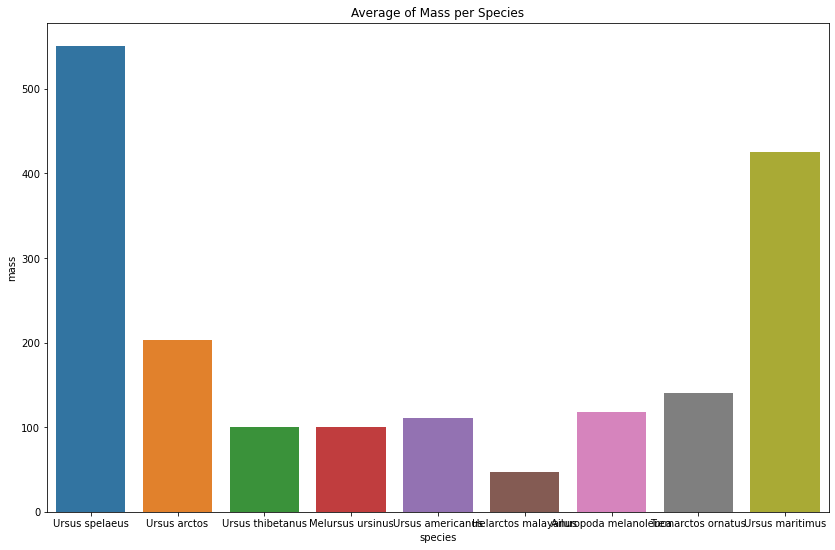

In [84]:
# Plot the mass of the species
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plot_dims = (14, 9)
fig, ax = plt.subplots(figsize=plot_dims)
sns.barplot(data=new_bears_mass, x='species', y='mass').set_title("Average of Mass per Species")

<AxesSubplot:title={'center':'Mass, molecular weight and GC-content of each species'}>

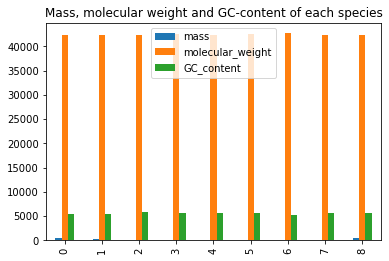

In [89]:
# Histogramplot of mass, molecular weight and GC-content of the species
%matplotlib inline
new_bears_mass.plot(kind='bar', title="Mass, molecular weight and GC-content of each species")

C:\Users\ashen\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GC_content', ylabel='Density'>

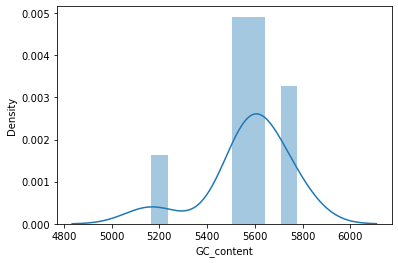

In [83]:
# Distribution of Gc_content
sns.distplot(new_bears_mass['GC_content'])

C:\Users\ashen\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='molecular_weight', ylabel='Density'>

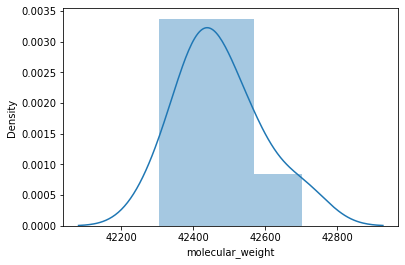

In [85]:
# Distribution of amino acid molecular weight
sns.distplot(new_bears_mass['molecular_weight'])